### Consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

consumption = pd.read_excel('../../Data/Consumption/Consumption_matrix.xlsx', index_col = 0) * 0.01
consumption.index = pd.date_range(start = '2000-01-01', end='2023-11-01', freq='M').strftime('%Y-%m')
consumption.index = pd.to_datetime(consumption.index)

In [2]:
consumption

,moneraty_rate,cpi_rate,ccpi_without_arg_crd_oil,ccpi_without_food_energy,retail_consumption,vehicle_consumption,credit_card_consumption,hushld_loan,mortgage_loan,credit_loan,durb_goods_sales,quas_drub_goods_sales,non_durb_goods_sales,gdp_lag1
2000-01-01,0.032,0.019,0.011,0.007,0.512,0.301,NaN,0.1014,NaN,NaN,0.447,0.105,0.108,NaN
2000-02-01,0.014,0.018,0.011,0.008,0.519,0.330,NaN,0.1004,NaN,NaN,0.541,0.095,0.091,NaN
2000-03-01,0.023,0.021,0.015,0.013,0.516,0.294,NaN,0.1005,NaN,NaN,0.383,0.100,0.092,NaN
2000-04-01,0.018,0.014,0.016,0.015,0.527,0.262,NaN,0.0996,NaN,NaN,0.335,0.125,0.116,NaN
2000-05-01,0.011,0.011,0.015,0.013,0.542,0.308,NaN,0.0996,NaN,NaN,0.376,0.112,0.173,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,0.022,0.027,0.041,0.035,1.064,1.192,0.679257,0.0481,0.0426,0.0647,0.083,-0.022,-0.005,0.002244
2023-07-01,0.025,0.023,0.039,0.033,1.030,1.045,0.696183,0.0480,0.0428,0.0652,0.014,-0.059,-0.019,0.000149
2023-08-01,0.022,0.034,0.039,0.033,1.027,1.020,NaN,0.0483,0.0431,0.0653,-0.019,-0.071,-0.056,0.003570
2023-09-01,0.025,0.037,0.038,0.033,1.029,1.028,NaN,0.0490,0.0435,0.0659,-0.029,-0.079,0.004,0.004302


#### GDP consumption

In [3]:
gdp_c = pd.read_excel('../../Data/Consumption/gdp_consumption.xlsx', index_col = 0) * 0.01
gdp_c.index = pd.date_range(start = '1960-01-01', end='2023-11-01', freq='Q').strftime('%Y-%m')
gdp_c.index = pd.to_datetime(gdp_c.index)
gdp_c = gdp_c.loc['2000':]

In [4]:
gdp_c['consumption_rate']

2000-03-01    0.132
2000-06-01    0.117
2000-09-01    0.079
2000-12-01    0.050
2001-03-01    0.029
              ...  
2022-09-01    0.052
2022-12-01    0.033
2023-03-01    0.046
2023-06-01    0.016
2023-09-01    0.003
Name: consumption_rate, Length: 95, dtype: float64

#### 결측월 채우기

In [5]:
from statsmodels.tsa.interp.denton import dentonm

estimated = pd.Series(
    dentonm(consumption['cpi_rate'].cumsum(), gdp_c['consumption_rate'].cumsum(), freq = "qm")*3,
    index = consumption.index,
    name = 'estimated_consumption'
)

In [6]:
consumption_matrix = pd.concat(
    [
        consumption,
        estimated.diff()
    ],
    axis = 1
)

In [7]:
consumption_matrix

,moneraty_rate,cpi_rate,ccpi_without_arg_crd_oil,ccpi_without_food_energy,retail_consumption,vehicle_consumption,credit_card_consumption,hushld_loan,mortgage_loan,credit_loan,durb_goods_sales,quas_drub_goods_sales,non_durb_goods_sales,gdp_lag1,estimated_consumption
2000-01-01,0.032,0.019,0.011,0.007,0.512,0.301,NaN,0.1014,NaN,NaN,0.447,0.105,0.108,NaN,NaN
2000-02-01,0.014,0.018,0.011,0.008,0.519,0.330,NaN,0.1004,NaN,NaN,0.541,0.095,0.091,NaN,0.062720
2000-03-01,0.023,0.021,0.015,0.013,0.516,0.294,NaN,0.1005,NaN,NaN,0.383,0.100,0.092,NaN,0.067401
2000-04-01,0.018,0.014,0.016,0.015,0.527,0.262,NaN,0.0996,NaN,NaN,0.335,0.125,0.116,NaN,0.030994
2000-05-01,0.011,0.011,0.015,0.013,0.542,0.308,NaN,0.0996,NaN,NaN,0.376,0.112,0.173,NaN,0.013406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,0.022,0.027,0.041,0.035,1.064,1.192,0.679257,0.0481,0.0426,0.0647,0.083,-0.022,-0.005,0.002244,-0.001337
2023-07-01,0.025,0.023,0.039,0.033,1.030,1.045,0.696183,0.0480,0.0428,0.0652,0.014,-0.059,-0.019,0.000149,-0.003589
2023-08-01,0.022,0.034,0.039,0.033,1.027,1.020,NaN,0.0483,0.0431,0.0653,-0.019,-0.071,-0.056,0.003570,0.005072
2023-09-01,0.025,0.037,0.038,0.033,1.029,1.028,NaN,0.0490,0.0435,0.0659,-0.029,-0.079,0.004,0.004302,0.010551


In [8]:
consumption_matrix = consumption_matrix[36:-1]

In [9]:
consumption_matrix.dropna(axis = 1, inplace = True)

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_63097/627097128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_matrix.dropna(axis = 1, inplace = True)


In [10]:
#consumption_matrix.to_csv('../../Cleaned_Data/consumption2.csv')

#### Primary Modeling

In [11]:
consumption_matrix

,moneraty_rate,cpi_rate,ccpi_without_arg_crd_oil,ccpi_without_food_energy,retail_consumption,vehicle_consumption,hushld_loan,mortgage_loan,durb_goods_sales,quas_drub_goods_sales,non_durb_goods_sales,gdp_lag1,estimated_consumption
2003-01-01,0.139,0.038,0.031,0.035,0.652,0.400,0.0706,0.0669,-0.037,0.041,0.160,-0.008508,0.000229
2003-02-01,0.133,0.039,0.030,0.035,0.602,0.397,0.0690,0.0656,-0.003,-0.065,-0.071,0.000228,-0.000067
2003-03-01,0.119,0.045,0.034,0.037,0.605,0.382,0.0696,0.0660,-0.083,-0.045,-0.035,-0.002923,0.003776
2003-04-01,0.103,0.037,0.032,0.035,0.603,0.380,0.0684,0.0649,-0.087,-0.080,-0.020,-0.002137,-0.003718
2003-05-01,0.091,0.032,0.031,0.034,0.615,0.365,0.0664,0.0630,-0.166,-0.054,0.062,-0.001895,-0.005998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.023,0.033,0.043,0.039,1.054,1.055,0.0483,0.0421,0.019,-0.033,-0.003,0.001622,0.001747
2023-06-01,0.022,0.027,0.041,0.035,1.064,1.192,0.0481,0.0426,0.083,-0.022,-0.005,0.002244,-0.001337
2023-07-01,0.025,0.023,0.039,0.033,1.030,1.045,0.0480,0.0428,0.014,-0.059,-0.019,0.000149,-0.003589
2023-08-01,0.022,0.034,0.039,0.033,1.027,1.020,0.0483,0.0431,-0.019,-0.071,-0.056,0.003570,0.005072


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = consumption_matrix.iloc[:,:-1]
y = consumption_matrix['estimated_consumption']

fold = 216

X_train, X_test, y_train, y_test = X[:fold], X[fold:], y[:fold], y[fold:]

model = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'squared_error',
                              max_depth = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0001645486151332557


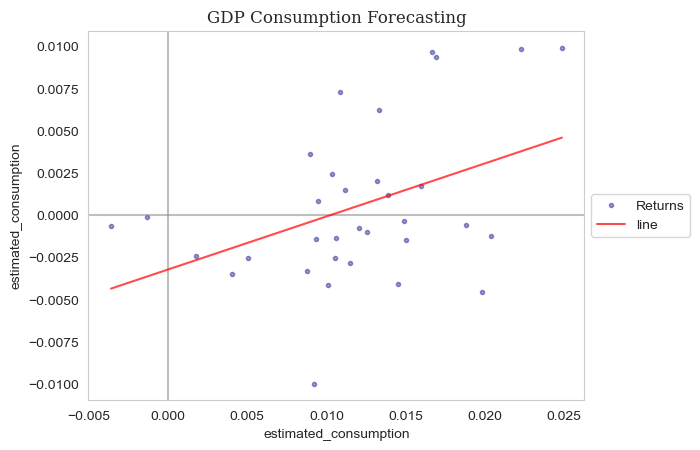

In [116]:
import seaborn as sns
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Consumption Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

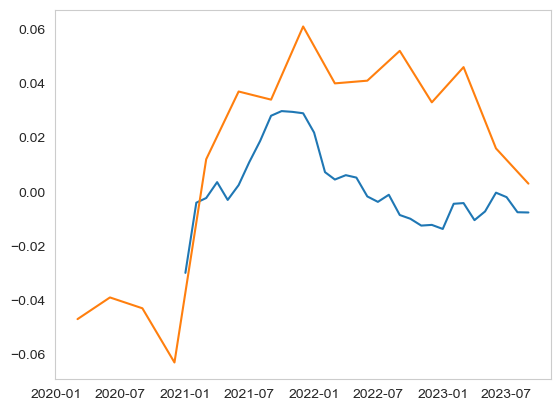

In [118]:
plt.plot(pd.Series(y_pred, index = X[fold:].index) * 3)
plt.plot(gdp_c['consumption_rate'][-15:].dropna())
plt.grid(False)

In [48]:
class DynamicForestRegressor(RandomForestRegressor) :
    def __init__(self, 
                 update_step : int, 
                 window : int = 12,
                 init_data : int = 120,
                 *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.update = update_step;
        self.window = window;
        self.init_data = init_data
        self.warm_start = True;
        self.n_estimators = 1000;
        self.criterion = 'suared_error';
        
    def fit(self, X, y, sample_weight = None, 
            verbose : bool = True) -> object:
        super().fit(X[:self.init_data], y[:self.init_data])
        for i in range(self.update) :
            if verbose == True : 
                print(f"Dynamic System Update {i+1} / {self.update}");
            super(DynamicForestRegressor, self).fit(X[(i+1) * self.window:self.init_data + (i+1) * self.window], 
                                                    y[(i+1) * self.window:self.init_data + (i+1) * self.window]);

In [93]:
model2 = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 42,
                               criterion = 'squared_error',
                               max_depth = 10,
                               warm_start = True)
for i in range(9) :
    model2.fit(X_train[i*12: 120+i*12], y_train[i*12: 120 + i*12])
    model2.n_estimators += 1000
    print(f"Dynamic System Update {i+1} / {9}");

Dynamic System Update 1 / 9
Dynamic System Update 2 / 9
Dynamic System Update 3 / 9
Dynamic System Update 4 / 9
Dynamic System Update 5 / 9
Dynamic System Update 6 / 9
Dynamic System Update 7 / 9
Dynamic System Update 8 / 9
Dynamic System Update 9 / 9


In [106]:
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00012813983992677235


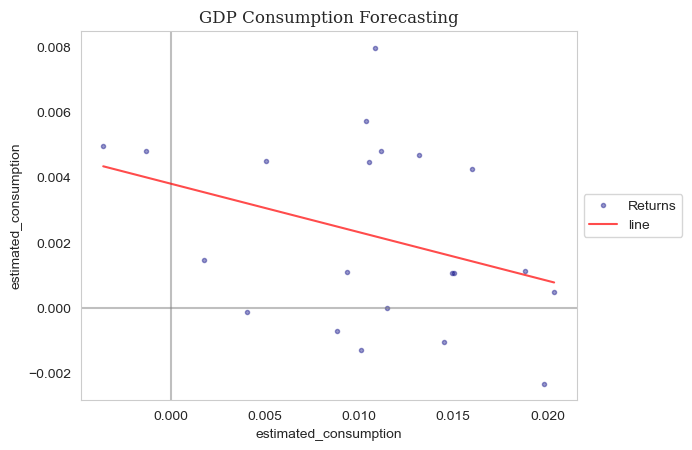

In [107]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Consumption Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

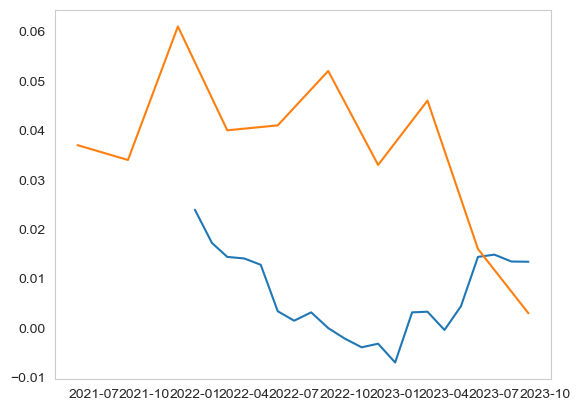

In [108]:
plt.plot(pd.Series(y_pred, index = X[fold:].index) * 3)
plt.plot(gdp_c['consumption_rate'][-10:].dropna())
plt.grid(False)

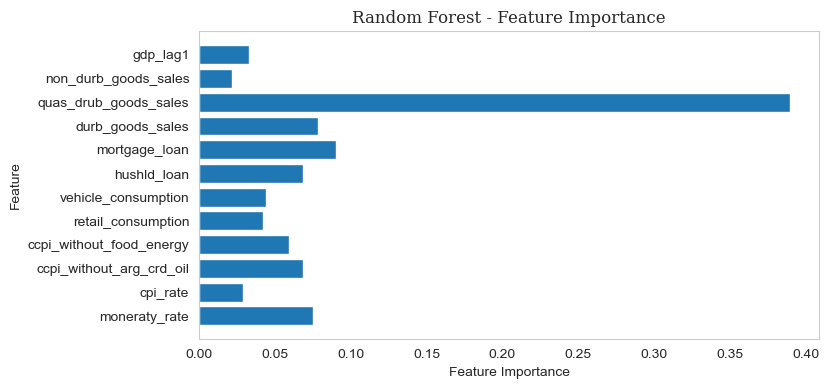

In [15]:
importance = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize = (8, 4))
plt.barh(range(len(importance)), importance, align="center")
plt.yticks(np.arange(len(importance)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.grid(False)
plt.title("Random Forest - Feature Importance", fontsize = 12, fontfamily = 'Serif')
plt.show()

In [16]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(model, X_train, y_train, n_repeats = 30, random_state = 42)
feature_names = X_train.columns

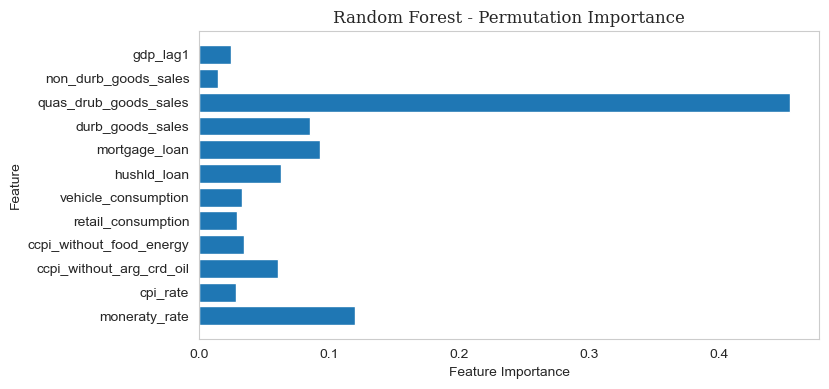

In [17]:
plt.figure(figsize = (8, 4))
plt.barh(range(len(importance['importances_mean'])), importance['importances_mean'], align="center")
plt.yticks(np.arange(len(importance['importances_mean'])), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.grid(False)
plt.title("Random Forest - Permutation Importance", fontsize = 12, fontfamily = 'Serif')
plt.show()

In [18]:
import shap

X = consumption_matrix.iloc[:,:-1]
y = consumption_matrix['estimated_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, shuffle = False)

explainer_randomforest_reg = shap.TreeExplainer(model)

shap_values_train = explainer_randomforest_reg(X_train)
shap_values_test = explainer_randomforest_reg(X_test)
shap_values_all = explainer_randomforest_reg(X)

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


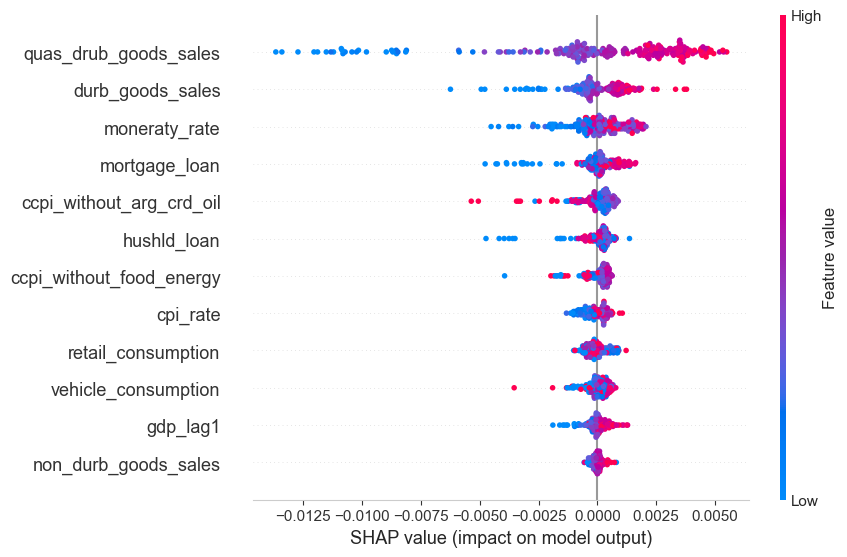

In [19]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

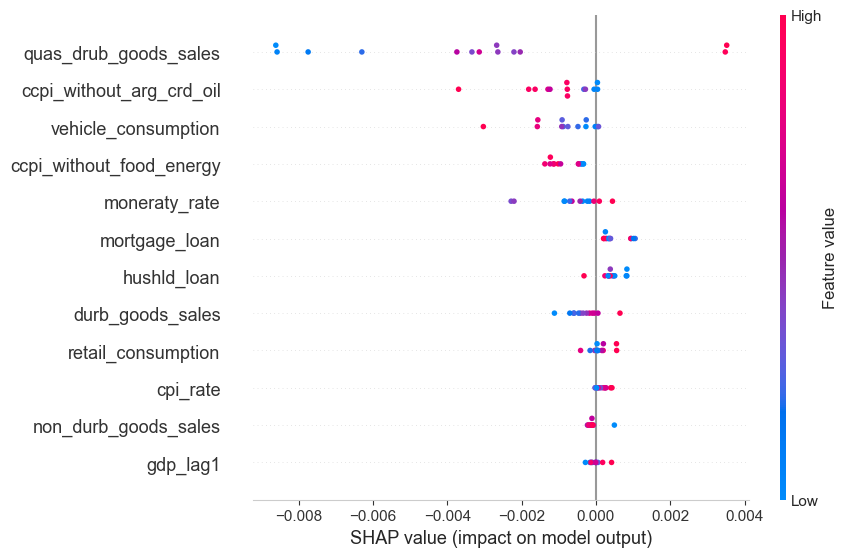

In [20]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

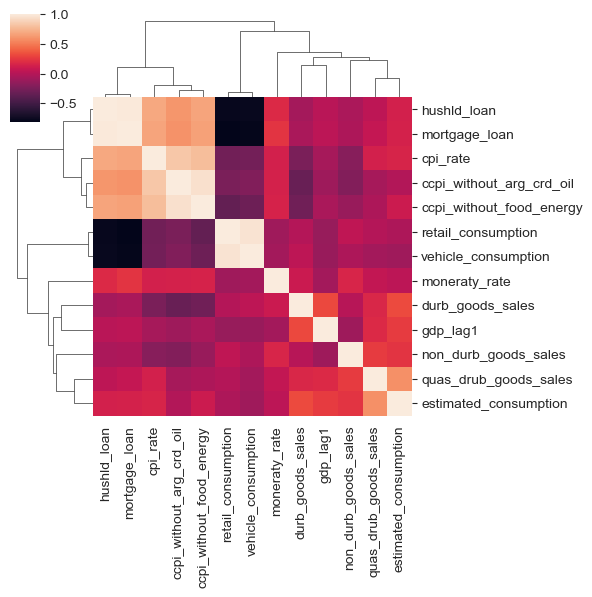

In [21]:
import seaborn as sns

sns.clustermap(consumption_matrix.corr(), figsize = (6,6))